In [9]:
import numpy as np
from typing import List
from services.TSP import TSP
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

In [10]:
def generate_metric_graph(N: int) -> List[List[float]]:
    points = np.random.uniform(0, 20, (N, 2))
    graph = [[0 for _ in range(N)] for _ in range(N)]
    for i in range(N):
        for j in range(N):
            graph[i][j] = np.linalg.norm(points[i]-points[j])
    return graph

  0%|          | 0/200 [00:00<?, ?it/s]

Shortest distance perfect: 51.223355685209576 (0.03931736946105957 sec)
Shortest distance first: 51.22335568520957 (0.0 sec)
Shortest distance first combination: 51.22335568520957 (0.0 sec)
Shortest distance perfect: 45.33545600887367 (0.03383135795593262 sec)
Shortest distance first: 47.644145554260646 (0.0 sec)
Shortest distance first combination: 45.343289029928954 (0.0 sec)
Shortest distance perfect: 58.36296776850994 (0.043215274810791016 sec)
Shortest distance first: 63.05524808772276 (0.0 sec)
Shortest distance first combination: 59.25379005304183 (0.0 sec)
Shortest distance perfect: 72.13197267555837 (0.09274053573608398 sec)
Shortest distance first: 86.9109048516827 (0.0 sec)
Shortest distance first combination: 75.54357679098021 (0.0 sec)
Shortest distance perfect: 62.38801368866716 (0.04024958610534668 sec)
Shortest distance first: 77.8941604056551 (0.0 sec)
Shortest distance first combination: 77.32284901510967 (0.0 sec)
Shortest distance perfect: 55.133570470227454 (0.0393

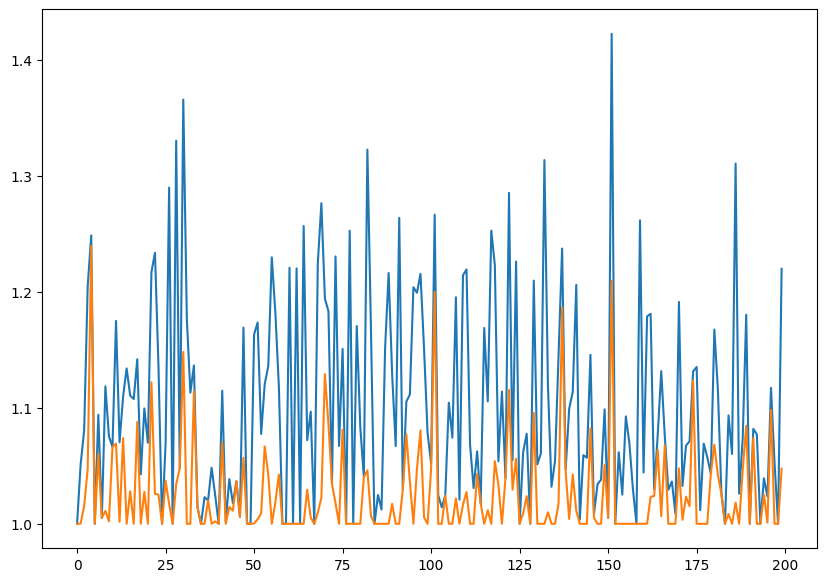

In [11]:
n = 200

alg_1 = []
alg_2 = []

for exp in tqdm(range(n)):
    N = 10
    graph = generate_metric_graph(N)
    node_weights = [1 for _ in range(N)]
    tsp = TSP(graph, node_weights)
    
    _, cost_p, time_p = tsp.perfect()
    
    _, cost_1, time_1 = tsp.shortest_distance_first()
    _, cost_2, time_2 = tsp.shortest_distance_first_combination()
    
    alg_1.append(cost_1/cost_p)
    alg_2.append(cost_2/cost_p)

plt.figure(figsize=(10, 7))
plt.plot(alg_1)
plt.plot(alg_2)
plt.show()

In [12]:
alg_1 = np.array(alg_1)
alg_2 = np.array(alg_2)

In [14]:
alg_1.mean(), alg_2.mean()

(1.1023697537833255, 1.0251822579102217)